In [4]:
import pandas as pd

df = pd.read_csv("../data/Final_data.csv", encoding = 'utf-8')
# df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/A_IPC_final.csv", encoding = 'utf-8')
# df['ipc코드'] = df['ipc코드'].str.split(',')

In [5]:
df.shape

(634130, 3)

In [6]:
df.drop(['출원번호'], axis = 1, inplace = True)

In [7]:
df.info

<bound method DataFrame.info of                                                        초록 ipc코드
0                                        quot 내용 없음 quot   A01N
1        목적 구조식 I 의 N 할로알킬 티오벤즈아닐리드 살균제 및 그 제조방법을 제공하는...  A01N
2       커피 제품을 제조하는 방법에 관한 것으로  강화된 방향성분을 갖는 가용성 커피 제품...  A23F
3        목적 공격억제활성 및 항정신병활성을 지닌 9  3  3 5 시스 디페닐 피페라지노...  A61K
4        목적 본 발명은 가치있는 공격억제 활성 및 항정신병 활성을 지닌 9  3  3 5...  A61K
...                                                   ...   ...
634125  본 고안의 일 실시예에 따른 다기능 키보드를 구비한 전자장치는 복수 개의 입력부들 ...  G10H
634126  복합 타악기가 개시된다. 복합 타악기는  압력이 전달되는 위치의 부착부에 부착되는 ...  G10H
634127    본 고안에 의해 개시된 마이크로폰 사운드박스 일체형장치는 제어 유닛  메인 사운...  G10H
634128    본 고안은 발건반 피아노에 관한 것으로서  정전용량센서를 이용하여 사용자의 발 ...  G10H
634129    노래방 장치를 제공한다. 노래방 장치는 노래의 선택을 입력 받는 노래 입력부와 ...  G10H

[634130 rows x 2 columns]>

# ipc 한자리만

In [8]:
df.head(3)

,초록,ipc코드
0,quot 내용 없음 quot,A01N
1,목적 구조식 I 의 N 할로알킬 티오벤즈아닐리드 살균제 및 그 제조방법을 제공하는...,A01N
2,커피 제품을 제조하는 방법에 관한 것으로 강화된 방향성분을 갖는 가용성 커피 제품...,A23F


In [9]:
a = []
for i in range(len(df)):
    a.append(df['ipc코드'][i][0])

df['ipc코드'] = a

In [10]:
df.head(3)

,초록,ipc코드
0,quot 내용 없음 quot,A
1,목적 구조식 I 의 N 할로알킬 티오벤즈아닐리드 살균제 및 그 제조방법을 제공하는...,A
2,커피 제품을 제조하는 방법에 관한 것으로 강화된 방향성분을 갖는 가용성 커피 제품...,A


위 코드를 보면 알 수 있듯이 모든 특허는 대분류[A,B,C,D,E,F,G]가 동일함

In [11]:
total = 0
double = 0
triple = 0
for i in range(len(df)):
    total += 1
    if (len(df['ipc코드'][i])) >= 2:
        double += 1
        if df['ipc코드'][i][0][0] != df['ipc코드'][i][1][0]:
            print('x')
    if (len(df['ipc코드'][i])) == 3:
        triple += 1

print(total-double-triple)
print(double - triple)
print(triple)

634130
0
0


Multi-label을 분류하기 위한 여러가지

1. [['a','b'],['c']]를 [[1, 1, 0], [0, 0, 1]]의 형태로 변경해서 예측

2. 1개의 값을 저격하며 가장 확률이 높은 순으로 정렬

3. 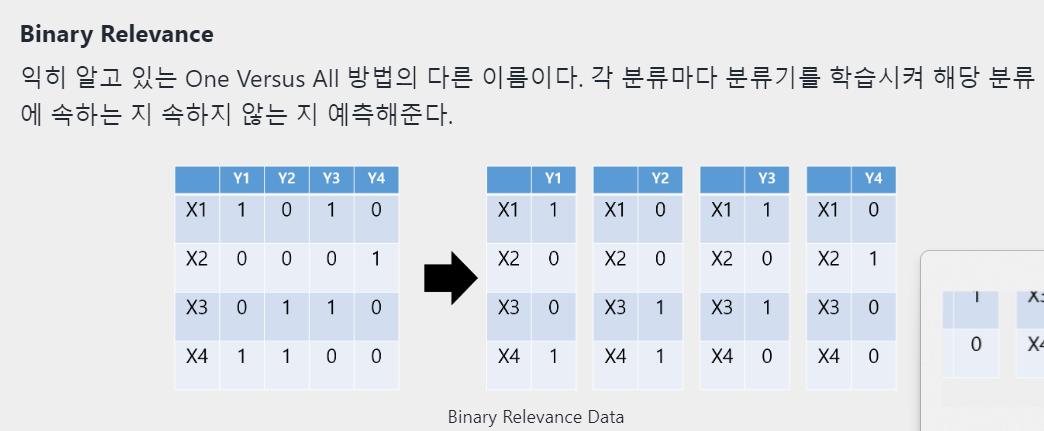

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()

labels = mlb.fit_transform(df.ipc코드)

new_train_df = pd.DataFrame(columns=mlb.classes_, data=labels)
new_train_df.insert(0,'document',df['초록'])
new_train_df.insert(1,'label',df['ipc코드'])
new_train_df.drop(0)
new_train_df.head(3)

,document,label,A,B,C,D,E,F,G
0,quot 내용 없음 quot,A,1,0,0,0,0,0,0
1,목적 구조식 I 의 N 할로알킬 티오벤즈아닐리드 살균제 및 그 제조방법을 제공하는...,A,1,0,0,0,0,0,0
2,커피 제품을 제조하는 방법에 관한 것으로 강화된 방향성분을 갖는 가용성 커피 제품...,A,1,0,0,0,0,0,0


In [13]:


id2ipc = {i: code for i, code in enumerate(mlb.classes_)}
label2id = {v: k for k, v in id2ipc.items()}
print(id2ipc)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}


In [14]:
new_train_df = new_train_df.drop(0)
new_train_df.head(3)

,document,label,A,B,C,D,E,F,G
1,목적 구조식 I 의 N 할로알킬 티오벤즈아닐리드 살균제 및 그 제조방법을 제공하는...,A,1,0,0,0,0,0,0
2,커피 제품을 제조하는 방법에 관한 것으로 강화된 방향성분을 갖는 가용성 커피 제품...,A,1,0,0,0,0,0,0
3,목적 공격억제활성 및 항정신병활성을 지닌 9 3 3 5 시스 디페닐 피페라지노...,A,1,0,0,0,0,0,0


In [17]:
label2id

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [18]:
new_train_df['label'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [16]:
new_train_df.head()

,document,label,A,B,C,D,E,F,G
1,목적 구조식 I 의 N 할로알킬 티오벤즈아닐리드 살균제 및 그 제조방법을 제공하는...,A,1,0,0,0,0,0,0
2,커피 제품을 제조하는 방법에 관한 것으로 강화된 방향성분을 갖는 가용성 커피 제품...,A,1,0,0,0,0,0,0
3,목적 공격억제활성 및 항정신병활성을 지닌 9 3 3 5 시스 디페닐 피페라지노...,A,1,0,0,0,0,0,0
4,목적 본 발명은 가치있는 공격억제 활성 및 항정신병 활성을 지닌 9 3 3 5...,A,1,0,0,0,0,0,0
5,목적 모발의 손상이 없고 다시 파마하고자 할때 파마가 잘되지 않는 일이 없고 ...,A,1,0,0,0,0,0,0


In [24]:
new_train_df['label'].iloc[0]

'A'

In [25]:
# for i in range(len(new_train_df)):
#     for j in range(len(new_train_df['label'][i])):
#         new_train_df['label'][i][j] = label2id[new_train_df['label'][i][j]]

for i in range(len(new_train_df)):
    new_train_df['label'][i] = label2id[new_train_df['label'].iloc[i]]

C:\Users\yeppi\AppData\Local\Temp\ipykernel_440\28148654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df['label'][i] = label2id[new_train_df['label'].iloc[i]]
C:\Users\yeppi\AppData\Local\Temp\ipykernel_440\28148654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_df['label'][i] = label2id[new_train_df['label'].iloc[i]]


KeyboardInterrupt: 

In [27]:
new_train_df.head(3)

,document,label,A,B,C,D,E,F,G
0,목적 구조식 I 의 N 할로알킬 티오벤즈아닐리드 살균제 및 그 제조방법을 제공하는...,0,1,0,0,0,0,0,0
1,커피 제품을 제조하는 방법에 관한 것으로 강화된 방향성분을 갖는 가용성 커피 제품...,0,1,0,0,0,0,0,0
2,목적 공격억제활성 및 항정신병활성을 지닌 9 3 3 5 시스 디페닐 피페라지노...,0,1,0,0,0,0,0,0


In [ ]:
new_train_df.to_csv('pre_data.csv', index = False)

In [26]:
new_train_df = pd.read_csv('pre_data.csv')

In [28]:
df = new_train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_df = df.iloc[:int(0.05 * len(df))]
valid_df = df.iloc[int(0.95 * len(df)):]

In [29]:
train_df.to_csv('train_df.csv')
valid_df.to_csv('valid_df.csv')

In [16]:
!pip install soynlp
!pip install transformers

In [17]:
!pip install constants
!pip install datasets

In [18]:
'''
전처리 코드
'''

import os
import re
import torch
import numpy as np
from datetime import datetime
from soynlp.normalizer import repeat_normalize
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from transformers import EvalPrediction


def clean(text):
    pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
    url_pattern = re.compile(
        r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')
    text = pattern.sub(' ', text)
    text = url_pattern.sub('', text)
    text = text.strip()
    text = repeat_normalize(text, num_repeats=2)

    return text

def make_current_datetime_dir(path):
    now = datetime.now().strftime(r'%Y%m%dT%H-%M-%S')
    make_dir_path = os.path.join(path, now)
    os.mkdir(make_dir_path)

    return make_dir_path


def preprocess_data(examples, tokenizer, labels):
    # take a batch of texts
    sentences = [clean(sentence) for sentence in examples['document']]  # KcELECTRA 사전 학습시 사용한 정제 적용

    # encode them
    # encoding = tokenizer(sentences, padding='max_length', truncation=True, max_length=80)

    '''
    Trainer에서 data_collector 사용으로
    padding, max_length 옵션을 지정해주지 않아도됨.
    data_collector에서 각 미니 배치에 포함된 sequence 중 가장 긴 sequence를 기준으로 나머지 문장을 padding 함
    '''
    encoding = tokenizer(sentences, truncation=True)

    # add labels
    labels_batch = {k: examples[k] for k in examples.keys() if k in labels}

    # create numpy array of shape (batch_size, num_labels)
    labels_matrix = np.zeros((len(sentences), len(labels)))

    # fill numpy array
    for idx, label in enumerate(labels):
        labels_matrix[:, idx] = labels_batch[label]

    encoding['labels'] = labels_matrix.tolist()

    return encoding


# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    # sigmoid = torch.nn.Sigmoid()
    # probs = sigmoid(torch.Tensor(predictions))

    # # next, use threshold to turn them into integer predictions
    # y_pred = np.zeros(probs.shape)
    # y_pred[np.where(probs >= threshold)] = 1

    softmaxed_data = torch.nn.functional.softmax(torch.Tensor(predictions), dim=1)

    # softmaxed_data = torch.nn.functional.softmax(data, dim=1)

    # 각 행에서 가장 큰 값의 위치 찾기
    max_indices = torch.argmax(softmaxed_data, dim=1)

    # 각 행별로 가장 큰 값은 1, 나머지는 0으로 바꾸기
    one_hot_encoded = torch.zeros_like(softmaxed_data)
    one_hot_encoded.scatter_(1, max_indices.view(-1, 1), 1)
    y_pred = one_hot_encoded
    # y_pred[np.where(softmaxed_data >= threshold)] = 1


    # finally, compute metrics
    y_true = labels

    count = 0
    for i in range(len(y_true)):
        for j in range(len(y_true[i])):
            if (y_true[i][j] == 1 and y_pred[i][j] == 1):
                count += 1
    print(f'한 개라도 맞출 확률 : {count / len(y_true) * 100} % ')

    f1_micro_average = f1_score(y_true=y_true, y_pred=y_pred, average='micro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'micro')
    accuracy = accuracy_score(y_true, y_pred)

    # return as dictionary
    metrics = {'f1': f1_micro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy}

    return metrics


def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    # print(preds, labels)
    return result


In [19]:
# shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)
# from sklearn.datasets import load_iris # 샘플 데이터 로딩
# from sklearn.model_selection import train_test_split

# data = df['초록']
# target = df['ipc코드']

# # train_test_split
# x_train, x_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, shuffle=True, random_state=34)

# train_data = pd.DataFrame({'document' : x_train, 'label' : y_train})

# train_data.to_csv('train_data.csv', index = False)

In [20]:
# pip install transformers[torch]

In [21]:
pip install accelerate -U

Note: you may need to restart the kernel to use updated packages.


In [22]:
# train.py

import os
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding
from transformers import TrainingArguments, Trainer, logging
# from utils import clean, make_current_datetime_dir, compute_metrics, preprocess_data


os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'
logging.set_verbosity_error()


def train(opt):
    tokenizer = AutoTokenizer.from_pretrained(opt['pretrained_tokenizer'])
    id2label = id2ipc
    label2id = {v: k for k, v in id2label.items()}
    labels = list(label2id.keys())
    dataset = load_dataset('csv', data_files={'train': opt['train_dataset_path'],
                                              'val': opt['val_dataset_path']
                                              }
                           )
    dataset = dataset.map(preprocess_data,
                                  batched=True,
                                  remove_columns=dataset['train'].column_names,
                                  fn_kwargs={'tokenizer': tokenizer,
                                             'labels': labels
                                             }
                                  )
    dataset.set_format('torch')
    model = AutoModelForSequenceClassification.from_pretrained(opt['pretrained_model'],
                                                            problem_type=opt['problem_type'],
                                                            num_labels=len(labels),
                                                            id2label=id2label,
                                                            label2id=label2id)
    args = TrainingArguments(
                            output_dir=make_current_datetime_dir(opt['output_dir']),
                            evaluation_strategy=opt['evaluation_strategy'],
                            save_strategy=opt['save_strategy'],
                            learning_rate=opt['learning_rate'],
                            per_device_train_batch_size=opt['per_device_train_batch_size'],
                            per_device_eval_batch_size=opt['per_device_eval_batch_size'],
                            num_train_epochs=opt['num_train_epochs'],
                            weight_decay=opt['weight_decay'],
                            load_best_model_at_end=opt['load_best_model_at_end'],
                            metric_for_best_model=opt['metric_for_best_model'],
                            seed=opt['seed'],
                            dataloader_num_workers=opt['dataloader_num_workers']
                            )
    trainer = Trainer(args=args,
                      model=model,
                      tokenizer=tokenizer,
                      train_dataset=dataset['train'],
                      eval_dataset=dataset['val'],
                      compute_metrics=compute_metrics,
                      data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
                      )

    trainer.train()


    # opt = {'pretrained_model': 'beomi/KcELECTRA-base-v2022',
    #        'pretrained_tokenizer': 'beomi/KcELECTRA-base-v2022',

if __name__ == '__main__':
    opt = {'pretrained_model': 'klue/roberta-small',
           'pretrained_tokenizer': 'klue/roberta-small',
           'problem_type': 'multi_label_classification',
           'train_dataset_path': 'train_df.csv',
           'val_dataset_path': 'valid_df.csv',
           'output_dir': 'weights/',
           'metric_for_best_model': 'f1',
           'evaluation_strategy': 'epoch',
           'save_strategy': 'epoch',
           'seed': 1031,
           'learning_rate': 5e-6,
           'per_device_train_batch_size': 8,
           'per_device_eval_batch_size': 4,
           'num_train_epochs': 10,
           'weight_decay': 0.01,
           'dataloader_num_workers': 2,
           'load_best_model_at_end': False,
           }

    train(opt)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/507304 [00:00<?, ? examples/s]

Map:   0%|          | 0/126826 [00:00<?, ? examples/s]

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: yeppi315 (gyubin5009). Use `wandb login --relogin` to force relogin


KeyboardInterrupt: 

In [27]:
# train.py

import os
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification, AutoTokenizer, DataCollatorWithPadding
from transformers import TrainingArguments, Trainer, logging
# from utils import clean, make_current_datetime_dir, compute_metrics, preprocess_data


os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'
logging.set_verbosity_error()


def train(opt):
    tokenizer = AutoTokenizer.from_pretrained(opt['pretrained_tokenizer'])
    id2label = id2ipc
    label2id = {v: k for k, v in id2label.items()}
    labels = list(label2id.keys())
    dataset = load_dataset('csv', data_files={'train': opt['train_dataset_path'],
                                              'val': opt['val_dataset_path']
                                              }
                           )
    dataset = dataset.map(preprocess_data,
                                  batched=True,
                                  remove_columns=dataset['train'].column_names,
                                  fn_kwargs={'tokenizer': tokenizer,
                                             'labels': labels
                                             }
                                  )
    dataset.set_format('torch')
    print(dataset)
    print(dataset['train'])
    print(dataset['train']['labels'])
    print(len(labels))
    model = AutoModelForSequenceClassification.from_pretrained(opt['pretrained_model'],
                                                            problem_type=opt['problem_type'],
                                                            num_labels=len(labels),
                                                            id2label=id2label,
                                                            label2id=label2id)
    args = TrainingArguments(
                            output_dir=make_current_datetime_dir(opt['output_dir']),
                            evaluation_strategy=opt['evaluation_strategy'],
                            save_strategy=opt['save_strategy'],
                            learning_rate=opt['learning_rate'],
                            per_device_train_batch_size=opt['per_device_train_batch_size'],
                            per_device_eval_batch_size=opt['per_device_eval_batch_size'],
                            num_train_epochs=opt['num_train_epochs'],
                            weight_decay=opt['weight_decay'],
                            load_best_model_at_end=opt['load_best_model_at_end'],
                            metric_for_best_model=opt['metric_for_best_model'],
                            seed=opt['seed'],
                            dataloader_num_workers=opt['dataloader_num_workers']
                            )
    trainer = Trainer(args=args,
                      model=model,
                      tokenizer=tokenizer,
                      train_dataset=dataset['train'],
                      eval_dataset=dataset['val'],
                      compute_metrics=compute_metrics,
                      data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
                      )

    trainer.train()


    # opt = {'pretrained_model': 'beomi/KcELECTRA-base-v2022',
    #        'pretrained_tokenizer': 'beomi/KcELECTRA-base-v2022',

if __name__ == '__main__':
    opt = {'pretrained_model': 'klue/roberta-small',
           'pretrained_tokenizer': 'klue/roberta-small',
           'problem_type': 'multi_label_classification',
           'train_dataset_path': 'train_df.csv',
           'val_dataset_path': 'valid_df.csv',
           'output_dir': 'weights/',
           'metric_for_best_model': 'f1',
           'evaluation_strategy': 'epoch',
           'save_strategy': 'epoch',
           'seed': 1031,
           'learning_rate': 5e-6,
           'per_device_train_batch_size': 8,
           'per_device_eval_batch_size': 4,
           'num_train_epochs': 10,
           'weight_decay': 0.01,
           'dataloader_num_workers': 2,
           'load_best_model_at_end': False,
           }

    train(opt)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 507304
    })
    val: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 126826
    })
})
Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
    num_rows: 507304
})
tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
7


KeyboardInterrupt: 